# Superconductivity

### Abstract:
Here is the abstract

### Introduction and theoretical overview:
Here is the stuff

### Experimental Setup and Procedures:
Sick pics go here.

### Experimental Data and Error Analysis:
Cute plots, good math.

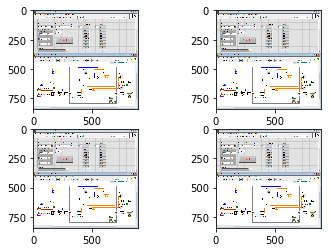

In [30]:
labview = plt.imread('superconductor_snip.PNG')
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)
ax1.imshow(labview)
ax2.imshow(labview)
ax3.imshow(labview)
ax4.imshow(labview)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from numpy import linspace,exp
from scipy.interpolate import UnivariateSpline, interp1d

% matplotlib inline

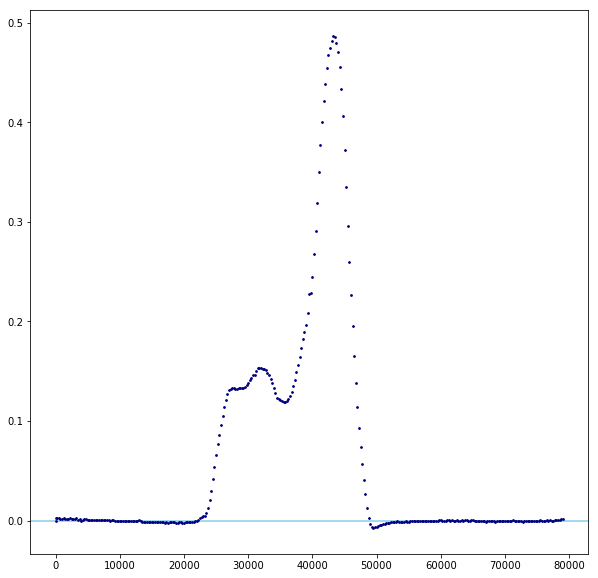

In [16]:
data = np.loadtxt('run1.txt')
time = data[:,0]
resistance = data[:,1]
plt.figure(figsize=(10,10))
plt.scatter(time,resistance, s=3, c='navy')
plt.axhline(0, color='skyblue', zorder=0)

### Discussion and Conclusion:
Jesus Christ what dou even do$^{[1]}$

### References:
[1] Richard Feynman